
=== Students Raw Data ===

   visual_score  auditory_score  kinesthetic_score learning_style
0      8.000301        1.389837           9.686887         visual
1      8.401052        7.294055           4.853655         visual
2      9.124874        3.975049           6.688173       auditory
3      5.724100        7.702631           7.535001       auditory
4      5.060739        4.711628           4.302653    kinesthetic


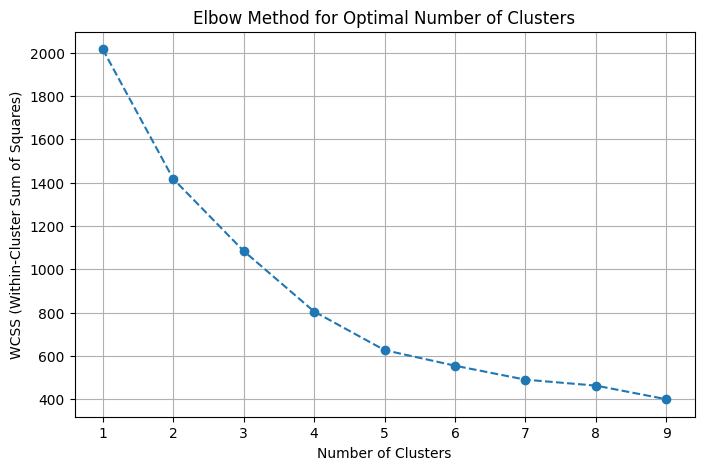


=== Students Clustered Based on Study Methods ===

    visual_score  auditory_score  kinesthetic_score learning_style  Cluster
0       8.000301        1.389837           9.686887         visual        1
1       8.401052        7.294055           4.853655         visual        0
2       9.124874        3.975049           6.688173       auditory        1
3       5.724100        7.702631           7.535001       auditory        0
4       5.060739        4.711628           4.302653    kinesthetic        2
..           ...             ...                ...            ...      ...
95      3.021422        2.362341           2.190592       auditory        2
96      1.622382        2.366976           9.798310       auditory        2
97      8.447489        3.957023           6.243658         visual        1
98      3.290865        1.490194           9.959267         visual        1
99      5.257248        2.642122           9.203633         visual        1

[100 rows x 5 columns]


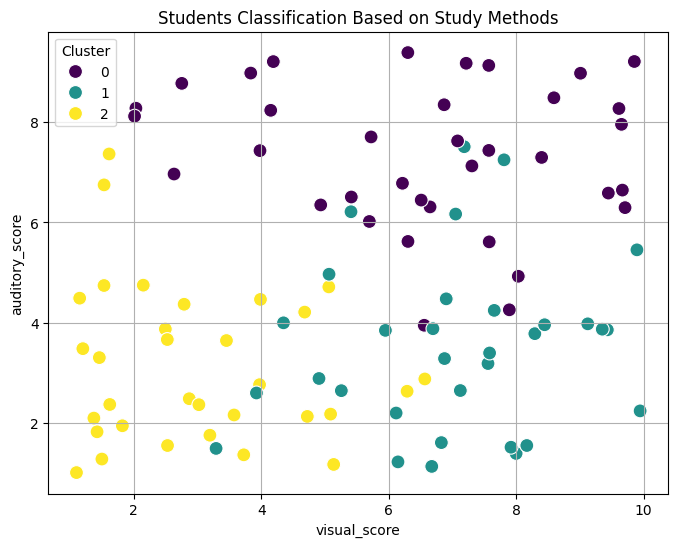

In [7]:
# Step 1: Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 3: Load your dataset (uploaded CSV file path)
file_path = '/content/student_methods.csv'  # Path for your uploaded file
df = pd.read_csv(file_path)

# Step 4: Preview the data
print("\n=== Students Raw Data ===\n")
print(df.head())  # Display the first 5 rows of the dataset

# Step 5: Select only numeric columns
# This removes non-numeric fields like names or IDs that KMeans can't process
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 6: Use Elbow Method to determine the optimal number of clusters
wcss = []  # List to store Within-Cluster Sum of Squares for each K
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numeric_df)  # Fit only on numeric data
    wcss.append(kmeans.inertia_)  # Store WCSS value for each cluster count

# Plot the Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Step 7: Apply KMeans Clustering
# Let's assume 3 clusters for this example (choose based on the elbow graph)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(numeric_df)  # Assign each student to a cluster

# Step 8: Display the clustered data
print("\n=== Students Clustered Based on Study Methods ===\n")
print(df)

# Step 9: Visualize the clustering result
# Plot using the first two numeric columns for X and Y axes
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x=numeric_df.columns[0],  # X-axis: first numeric column
    y=numeric_df.columns[1],  # Y-axis: second numeric column
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Students Classification Based on Study Methods')
plt.xlabel(numeric_df.columns[0])
plt.ylabel(numeric_df.columns[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
